In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


# 加载数据
data = fetch_california_housing(as_frame=True)
X = data['data']
y = data['target']

# 只使用前100个样本
X = X[:100]
y = y[:100]

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练 SVM 模型
model = SVR(kernel='linear')
model.fit(X_train, y_train)






SVR(kernel='linear')

In [2]:
from EnLIMEStructuredExplain import EnLimeInterpreter

In [3]:
# 创建 LimeInterpreter 对象
interpreter = EnLimeInterpreter(model, X_train,local_model='EnLIME-random_forest',num_samples=100,weights_method='LIME')

# 选择要解释的实例（这里选择测试集的第一条数据）
instance = X_test.iloc[0]

# 使用 LimeInterpreter 解释此实例
importances = interpreter.interpret(instance)

# 输出每个特征的重要性
print(importances)

MedInc        0.828385
HouseAge      0.016989
AveRooms      0.081334
AveBedrms     0.009932
Population    0.027420
AveOccup      0.015623
Latitude      0.012954
Longitude     0.007361
dtype: float64


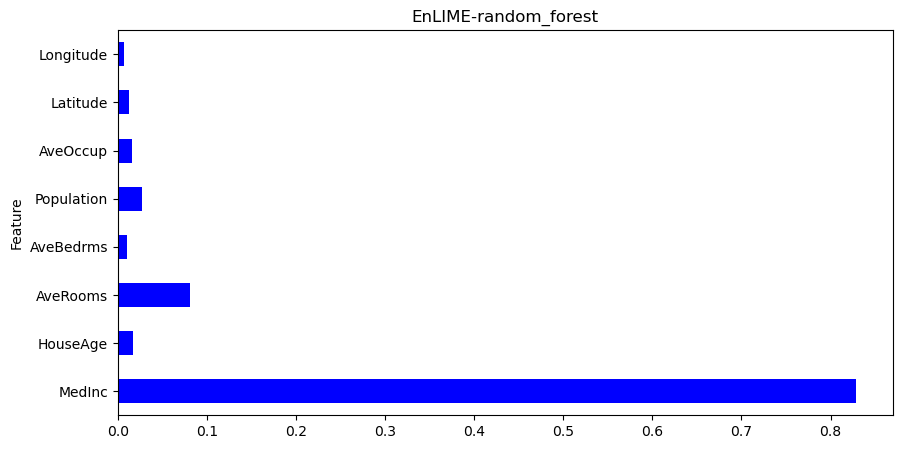

In [4]:
interpreter.plot_importance(importances,plot_title='EnLIME-random_forest')



In [5]:
global_importances = interpreter.global_interpret( subset='train', weights_method='LIME',local_model='EnLIME-random_forest')


global_importances


MedInc        68.814872
HouseAge       1.471867
AveRooms       5.135211
AveBedrms      0.914815
Population     1.316685
AveOccup       0.796449
Latitude       0.776223
Longitude      0.773879
dtype: float64

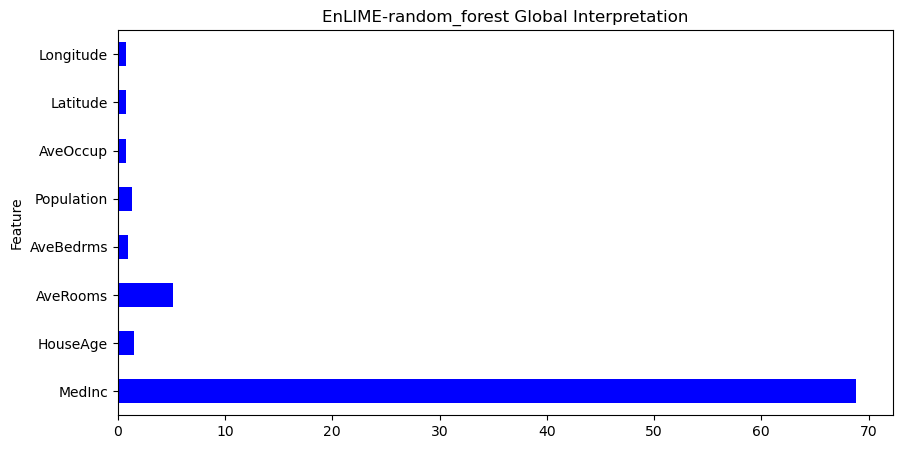

In [6]:
interpreter.plot_importance(global_importances, plot_title='EnLIME-random_forest Global Interpretation', global_interpret=True)